### Investigate 18469 null dates in was_submitted_datetime_actual

In [1]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


In [2]:
dfFlt  = load_df('dfFlt')


###### Create Dataframe of null observations

In [3]:
nullDf = dfFlt.filter(F.col('was_submitted_datetime_actual').isNull())
nullDf.count()

18469

Dataframe contains the 18,469 null was_submitted_datetime_actual

###### Display single values

In [4]:
display_single_val(nullDf)

,0
assignment_max_attempts,1
assignment_late_submission,False
assignment_attempt_number,1
was_submitted_datetime_actual,NaT
is_manual_scoring_required,False
learner_attempt_status,fully scored
is_deleted,False


- No new single values

###### Display boxplot of dates

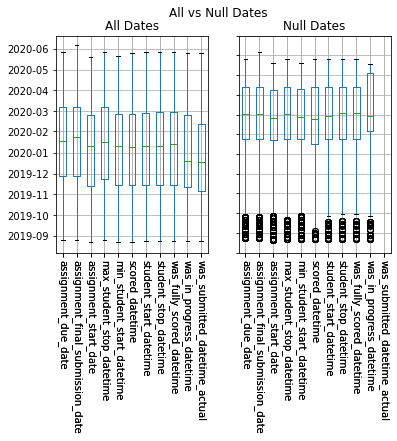

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, sharex=True)

date_boxplot( get_random_sample(dfFlt), "All Dates", ax1)

date_boxplot(nullDf, "Null Dates", ax2)

plt.suptitle('All vs Null Dates')

plt.show()

- Median shifted one and half months from 1/15/2020 to 3/2020
- All distributions right skewed
- Majority of dates in the last half of school year
- Similar caracteristics as the 16,582 zero values in final_score_unweighted

##### Crosstabulate with 16,582 zero final_score_unweighted

In [9]:
pdDf = get_random_sample(dfFlt).withColumn(
                "zero_score",
                  F.when( F.col('final_score_unweighted') == 0, 'Yes').otherwise("No")
                ).withColumn(
                "null_date",
                  F.when( F.col('was_submitted_datetime_actual').isNull(), 'Yes').otherwise("No")
                ).toPandas()

crosstab_percent( pd.crosstab(pdDf.zero_score, pdDf.null_date) )

null_date,No,Yes
zero_score,,
No,94.0,6.0
Yes,14.0,86.0


- Strongly correlated with final_score_unweighted = 0
  - 86% of zero score with null date

###### Conclusion
- Need to find reason for final_score_unweighted = 0


In [ ]:


finish_todo('Investigate 18469 null dates in was_submitted_datetime_actual')